In [1]:
import json
from matplotlib import pyplot as plt
import sklearn
from collections import defaultdict
from sklearn import linear_model
import numpy as np
import random
import gzip
import math
import pandas as pd 
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter("ignore")
from sklearn import *
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
data2 = []
for line in open("renttherunway_final_data.json", "r"):
    data2.append(json.loads(line))

df2 = pd.DataFrame.from_dict(data2)
df2

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31,"November 25, 2015"


In [3]:
series = df2.category.value_counts(0)

In [4]:
series = series.reset_index()

In [5]:
df = df2.copy()

In [6]:
df = df.dropna(subset=["rating"])
#df = df.drop(columns=["rented for", "bust size", "body type", "review_date", "user_id"])
df = df.drop(columns=['fit','body type','bust size','category','item_id','user_id','rented for','review_date','age'])

In [7]:
df

,weight,rating,review_text,review_summary,height,size
0,137lbs,10,An adorable romper! Belt and zipper were a lit...,So many compliments!,"5' 8""",14
1,132lbs,10,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,"5' 6""",12
2,NaN,10,This hugged in all the right places! It was a ...,It was a great time to celebrate the (almost) ...,"5' 4""",4
3,135lbs,8,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,"5' 5""",8
4,145lbs,10,I have always been petite in my upper body and...,Was in love with this dress !!!,"5' 9""",12
...,...,...,...,...,...,...
192539,140lbs,10,Fit like a glove!,LOVE IT!!! First Item Im thinking of buying!,"5' 9""",8
192540,100lbs,10,The pattern contrast on this dress is really s...,LOVE it!,"5' 1""",4
192541,135lbs,6,"Like the other DVF wraps, the fit on this is f...","Loud patterning, flattering fit","5' 8""",8
192542,165lbs,10,This dress was PERFECTION. it looked incredib...,loved this dress it was comfortable and photog...,"5' 6""",16


In [8]:
def height_in_cms(ht):
  if ht.lower() != 'nan':
    ht = ht.replace('\'','').replace('"', '') #'5\' 8"'
    h_ft = int(ht.split()[0])
    if len(ht.split()) > 1:
      h_inch = int(ht.split()[1])
    else:
      h_inch = 0
    h_inch += h_ft * 12
    h_cm = int(h_inch * 2.54)
    return h_cm


In [9]:
df.height = df.height.astype(str).apply(height_in_cms)

In [10]:
df.head()

,weight,rating,review_text,review_summary,height,size
0,137lbs,10,An adorable romper! Belt and zipper were a lit...,So many compliments!,172.0,14
1,132lbs,10,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,167.0,12
2,NaN,10,This hugged in all the right places! It was a ...,It was a great time to celebrate the (almost) ...,162.0,4
3,135lbs,8,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,165.0,8
4,145lbs,10,I have always been petite in my upper body and...,Was in love with this dress !!!,175.0,12


In [11]:
print(type(df.height[0]))

<class 'numpy.float64'>


In [12]:
def weightwolbs(w):
    global w1
    if w.lower() != 'nan':
        w1=int(w[:-3])
    return w1


In [13]:
df.weight

0         137lbs
1         132lbs
2            NaN
3         135lbs
4         145lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 192462, dtype: object

In [14]:
df.weight = df.weight.astype(str).apply(weightwolbs)
df.head()

,weight,rating,review_text,review_summary,height,size
0,137,10,An adorable romper! Belt and zipper were a lit...,So many compliments!,172.0,14
1,132,10,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,167.0,12
2,132,10,This hugged in all the right places! It was a ...,It was a great time to celebrate the (almost) ...,162.0,4
3,135,8,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,165.0,8
4,145,10,I have always been petite in my upper body and...,Was in love with this dress !!!,175.0,12


In [15]:
print(type(df.weight[0]))

<class 'numpy.int64'>


In [16]:
df.height.fillna(value=df.height.mean(), inplace=True)
df.height.isnull().sum()

0

In [17]:
df.weight.fillna(value=df.weight.mean(), inplace=True)
df.weight.isnull().sum()

0

In [18]:
print(type(df.rating[0]))

<class 'str'>


In [19]:
def ratestr(r):
    global r1
    if r != 'nan':
        r1=int(r)
    return r1

df.rating = df.rating.astype(str).apply(ratestr)

In [20]:
print(type(df.rating[1]))

<class 'numpy.int64'>


In [21]:
df.rating.fillna(value=df.rating.mean(), inplace=True)
df.rating.isnull().sum()

0

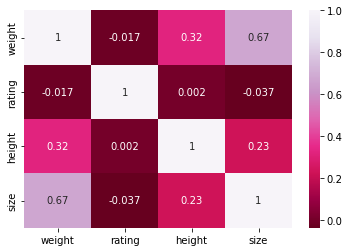

In [23]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, cmap="PuRd_r", annot=True)
plt.show()

In [23]:
df.dtypes

weight              int64
rating              int64
review_text        object
review_summary     object
height            float64
size                int64
dtype: object

In [24]:
df.head()

,weight,rating,review_text,review_summary,height,size
0,137,10,An adorable romper! Belt and zipper were a lit...,So many compliments!,172.0,14
1,132,10,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,167.0,12
2,132,10,This hugged in all the right places! It was a ...,It was a great time to celebrate the (almost) ...,162.0,4
3,135,8,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,165.0,8
4,145,10,I have always been petite in my upper body and...,Was in love with this dress !!!,175.0,12


In [31]:
#X = df.iloc[:,[1,5]]
# X = df.loc[:,['weight','height']].values.reshape(-1,1)
# y= df.loc[:,['size']].values.reshape(-1,1)

In [32]:
df['height']

0         172.0
1         167.0
2         162.0
3         165.0
4         175.0
          ...  
192539    175.0
192540    154.0
192541    172.0
192542    167.0
192543    167.0
Name: height, Length: 192462, dtype: float64

In [163]:

we=df['weight'].values.tolist()
hi=df['height'].values.tolist()
si=df['size'].values.tolist()
max_value = np.max(si)
min_value = np.min(si)
print(max_value)
print(min_value)
print(len(we))
print(len(hi))
print(len(si))

58
0
192462
192462
192462


In [148]:
def feature1(i):
    feat = [1] # Constant feature
    feat.append(we[i]) # weight
    feat.append(hi[i]) # heigth
    return feat

######## Linear Regression

X = np.asarray([feature1(i) for i in range(192462)])
y = np.asarray(si).T

 

In [149]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20)

In [150]:
X_train.shape, X_test.shape

((153969, 3), (38493, 3))

In [151]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [152]:
LinReg = sklearn.linear_model.LinearRegression(fit_intercept=False)
LinReg.fit(X, y)
y_pred = LinReg.predict(X)
print(mean_squared_error(y, y_pred))

39.56948615971421


In [157]:
LinReg = sklearn.linear_model.LinearRegression(fit_intercept=False)
LinReg.fit(X_train, y_train)
y_pred = LinReg.predict(X_test)
theta = LinReg.coef_
a1=theta[0]
a2=theta[1]
a3=theta[2]
#print(a1,a2,a3)
print(MSE(y_test,y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
# print(len(X_train))
# print(len(y_train))
# print(len(X_test))
# print(len(y_test))
# print(len(y_pred))
# plt.scatter(X_train, y_train,color='g') 

# plt.plot(X_test, y_pred,color='k') 



# plt.show()

39.92961360016226
0.44350564983729324
4.329438999056379


R Square/Adjusted R Square is better used to explain the model to other people because you can explain the number as a percentage of the output variability. MSE, RMSE, or MAE are better be used to compare performance between different regression models. Personally, I would prefer using RMSE and I think Kaggle also uses it to assess the submission. However, it makes total sense to use MSE if the value is not too big and MAE if you do not want to penalize large prediction errors.

Adjusted R square is the only metric here that considers the overfitting problem. R Square has a direct library in Python to calculate but I did not find a direct library to calculate Adjusted R square except using the statsmodel results. If you really want to calculate Adjusted R Square, you can use statsmodel or use its mathematic formula directly.

In [159]:
reg = DecisionTreeRegressor(random_state = 0, max_depth = 6)
reg.fit(X, y)
y_predDT = reg.predict(X)
print(r2_score(y, y_predDT))
print(MSE(y,y_predDT))
print(mean_absolute_error(y, y_predDT))

0.4743117877724009
37.94023753413949
4.213375121583874


In [139]:
#TAKING ONLY WEIGHT AS FEATURE


def feature2(i):
    feat = [1] # Constant feature
    feat.append(we[i]) # weight
    return feat

X1 = np.asarray([feature2(i) for i in range(192462)])
y1 = np.asarray(si).T

X_train1, X_test1, y_train1, y_test1 = sklearn.model_selection.train_test_split(X1, y1, test_size=0.20)

In [160]:
LinReg1 = sklearn.linear_model.LinearRegression(fit_intercept=False)
LinReg1.fit(X1, y1)
y_pred1 = LinReg1.predict(X1)
print(mean_squared_error(y1, y_pred1))
print(r2_score(y1, y_pred1))
print(mean_absolute_error(y1, y_pred1))

39.57995286169991
0.4515923986718364
4.317383106468856
